# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

This notebook explores Dandiset 001361 version 0.250406.0045. Please note that this notebook was AI-generated and has not been fully verified. Researchers should be cautious when interpreting the code or results and ideally verify critical sections independently.

## Overview of the Dandiset

This Dandiset contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The data supports the findings in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience. The Dandiset is available at: https://dandiarchive.org/dandiset/001361/0.250406.0045

## What this notebook will cover

This notebook will demonstrate how to:
- Load the Dandiset using the DANDI API.
- Access an NWB file from the Dandiset.
- Explore the structure and metadata of the NWB file.
- Load and visualize examples of behavioral data (position and speed).
- Load and visualize examples of optical physiology data (deconvolved fluorescence traces and ROI masks).
- Show a basic example of correlating neuronal activity with behavior.

## Required Packages

To run this notebook, you will need the following packages installed:
- dandi
- pynwb
- h5py
- remfile
- numpy
- matplotlib
- pandas
- seaborn

## Loading the Dandiset

We will use the `dandi` Python client to access the Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = list(dandiset.get_assets()) # Convert to list to get a concrete set of assets
print(f"\nFirst 5 assets (out of {len(assets)}):")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

First 5 assets (out of 152):
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## Accessing an NWB File

We will focus on one specific NWB file for demonstration: `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`. This file contains both behavioral and optical physiology data from subject 'm11' during session '03'.

In [2]:
import pynwb
import h5py
import remfile

# Define the URL for the NWB file - obtained from tools_cli.py dandiset-assets
nwb_file_url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
asset_filepath = "sub-m11/sub-m11_ses-03_behavior+ophys.nwb"

# Load the NWB file using remfile and pynwb
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Successfully loaded NWB file: {asset_filepath}")
# print(nwb) # Avoid printing the full NWB object as it can produce excessive output

# Displaying some basic metadata from the NWB file
print("\nNWB File Metadata:")
print(f"- Session description: {nwb.session_description}")
print(f"- Identifier: {nwb.identifier}")
print(f"- Session start time: {nwb.session_start_time}")
print(f"- Subject ID: {nwb.subject.subject_id}")
print(f"- Species: {nwb.subject.species}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Successfully loaded NWB file: sub-m11/sub-m11_ses-03_behavior+ophys.nwb

NWB File Metadata:
- Session description: processed suite2p data
- Identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
- Session start time: 2023-02-23 00:00:00-08:00
- Subject ID: m11
- Species: Mus musculus


You can explore this NWB file interactively on Neurosift using the following link:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045

## Summarizing NWB File Contents

This NWB file contains several types of data, including behavioral data and optical physiology data. Here's a summary of the main components based on the `nwb-file-info` output:

```
├── acquisition
│   └── TwoPhotonSeries (Two-photon imaging data)
└── processing
    ├── behavior (Processing module for behavioral data)
    │   └── BehavioralTimeSeries (Time series data for behavior)
    │       ├── Reward (Reward delivery)
    │       ├── autoreward (Automatic reward indication)
    │       ├── environment (Virtual reality environment)
    │       ├── lick (Lick detection)
    │       ├── position (Position in a virtual linear track)
    │       ├── reward_zone (Reward zone entry)
    │       ├── scanning (Scanning indication for ophys data)
    │       ├── speed (Animal speed)
    │       ├── teleport (End of a trial)
    │       ├── trial number (Trial number)
    │       └── trial_start (Start of a trial)
    └── ophys (Processing module for optical physiology data)
        ├── Backgrounds_0 (Images for backgrounds)
        │   ├── Vcorr
        │   ├── max_proj
        │   └── meanImg
        ├── Deconvolved (Deconvolved fluorescence data)
        │   └── plane0 (Deconvolved fluorescence traces for plane 0)
        ├── Fluorescence (Fluorescence data)
        │   └── plane0 (Fluorescence traces for plane 0)
        ├── ImageSegmentation (Image segmentation data)
        │   └── PlaneSegmentation (Plane segmentation with ROI information)
        └── Neuropil (Neuropil fluorescence data)
            └── plane0 (Neuropil fluorescence traces for plane 0)
```

## Loading and Visualizing Behavioral Data

We will now load and visualize the animal's position and speed over time from the `BehavioralTimeSeries`.

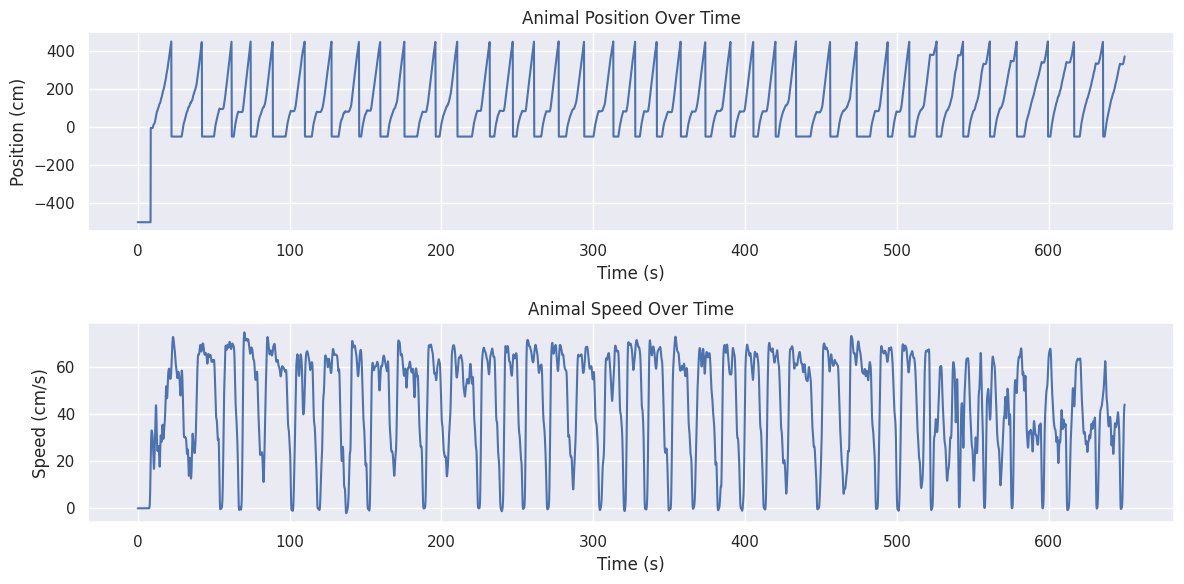

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme() # Use seaborn theme for plots

# Get behavioral data
behavior_ts = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"]
position = behavior_ts.time_series["position"]
speed = behavior_ts.time_series["speed"]

# Get data and timestamps (limiting to first 650 seconds for illustration)
# Note: Adjust the time range as needed for your analysis
max_time = 650
position_data = position.data[position.timestamps[:] < max_time]
speed_data = speed.data[speed.timestamps[:] < max_time]
timestamps = position.timestamps[position.timestamps[:] < max_time]

# Create plots
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(timestamps, position_data)
plt.xlabel("Time (s)")
plt.ylabel("Position (cm)")
plt.title("Animal Position Over Time")

plt.subplot(2, 1, 2)
plt.plot(timestamps, speed_data)
plt.xlabel("Time (s)")
plt.ylabel("Speed (cm/s)")
plt.title("Animal Speed Over Time")

plt.tight_layout()
plt.show()

The plots above show the animal's position in the virtual linear track and its speed. The sawtooth pattern in the position plot indicates repeated traversals of the track, and the speed plot shows corresponding increases in speed during movement and drops when stationary or at the ends of the track.

## Loading and Visualizing Optical Physiology Data

We will now explore the optical physiology data from the `ophys` processing module. Specifically, we will look at the deconvolved fluorescence traces from `plane0` which represent neural activity, and visualize the spatial masks of a few Regions of Interest (ROIs) overlaid on a background image.

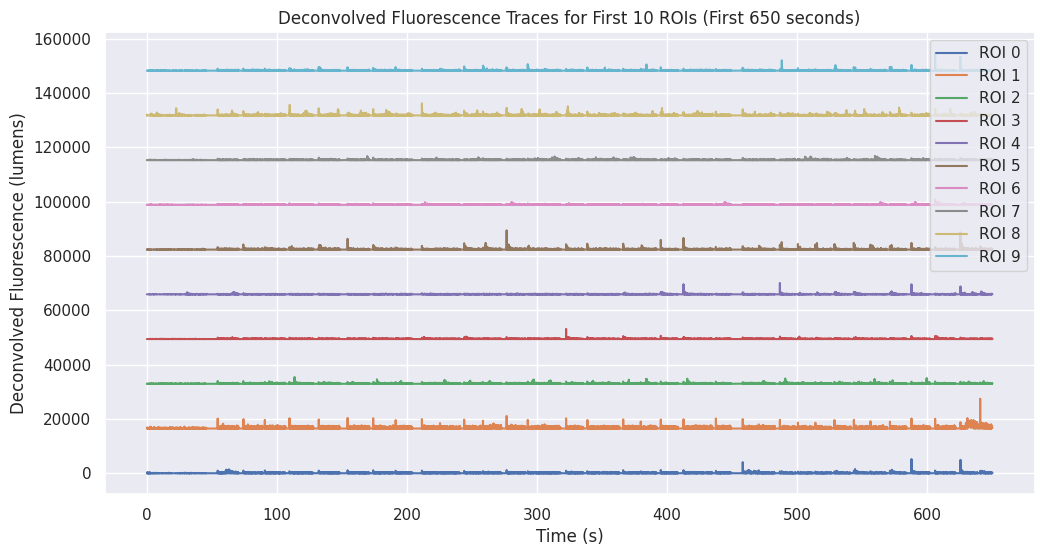

In [4]:
import pandas as pd
from matplotlib.patches import Polygon

# Get ophys data
ophys_module = nwb.processing["ophys"]
deconvolved_fluorescence = ophys_module.data_interfaces["Deconvolved"]
roi_response_series = deconvolved_fluorescence.roi_response_series["plane0"]

# Get deconvolved fluorescence data and timestamps (limiting to first 650 seconds and first 10 ROIs for illustration)
# Note: Adjust the time range and number of ROIs as needed for your analysis
max_time = 650
num_rois_to_plot = 10

# Generate timestamps using starting_time and rate
starting_time = roi_response_series.starting_time
rate = roi_response_series.rate
num_samples_total = roi_response_series.data.shape[0]
timestamps_total = starting_time + np.arange(num_samples_total) / rate

# Find indices of timestamps within the desired range
timestamp_indices = np.where(timestamps_total < max_time)[0]

if len(timestamp_indices) > 0:
    # Get a subset of deconvolved fluorescence data and corresponding timestamps
    fluorescence_data_subset = roi_response_series.data[timestamp_indices, 0:num_rois_to_plot]
    timestamps_subset = timestamps_total[timestamp_indices]

    # Plot deconvolved fluorescence traces for a few ROIs
    plt.figure(figsize=(12, 6))
    for i in range(fluorescence_data_subset.shape[1]):
        # Offset for visualization clarity and better scaling
        offset = i * (np.max(fluorescence_data_subset) - np.min(fluorescence_data_subset)) * 1.5
        plt.plot(timestamps_subset, fluorescence_data_subset[:, i] + offset, label=f'ROI {roi_response_series.rois.table.id[i]}')
    plt.xlabel('Time (s)')
    plt.ylabel('Deconvolved Fluorescence (lumens)')
    plt.title(f'Deconvolved Fluorescence Traces for First {num_rois_to_plot} ROIs (First {max_time} seconds)')
    plt.legend()
    plt.show()
else:
    print(f"No deconvolved fluorescence data found within the first {max_time} seconds.")

The plot above shows the deconvolved fluorescence traces for the first 10 ROIs during the initial 650 seconds of the recording. Deconvolution aims to estimate the underlying neuronal spiking activity from the measured calcium signals. Different neurons show varying patterns of activity over time, which might be related to the animal's behavior.

Now, let's visualize the spatial masks of a few ROIs to see their location and shape in the imaging plane, overlaid on a background image for context.

First 5 rows of PlaneSegmentation DataFrame:
                                           pixel_mask  \
id                                                      
0   [[136, 471, 11.239327], [136, 472, 12.38877], ...   
1   [[164, 400, 15.628908], [164, 401, 17.650463],...   
2   [[209, 552, 16.836023], [209, 553, 18.55048], ...   
3   [[161, 537, 13.172347], [161, 538, 12.249123],...   
4   [[148, 458, 13.488646], [148, 459, 21.197554],...   

                        iscell  planeIdx  
id                                        
0   [0.0, 0.49814834778690403]         0  
1    [0.0, 0.8500147314559483]         0  
2    [1.0, 0.6779582307988627]         0  
3    [1.0, 0.8864013707883429]         0  
4     [1.0, 0.870102957697157]         0  


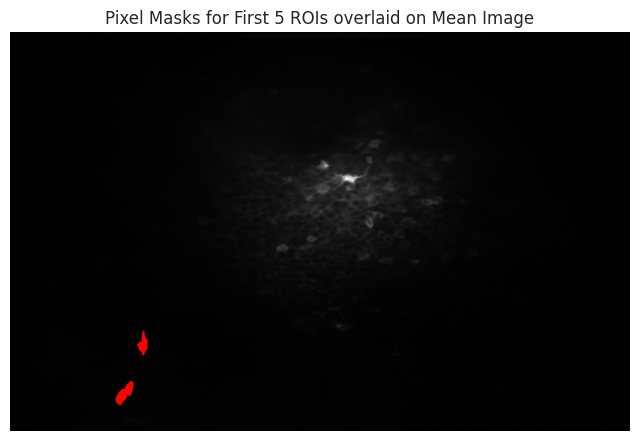

In [5]:
# Get ImageSegmentation and ROIs
image_segmentation = ophys_module.data_interfaces["ImageSegmentation"]
plane_segmentation = image_segmentation.plane_segmentations["PlaneSegmentation"]

num_rois_to_visualize = 5 # Define the number of ROIs to visualize here

# Get ROIs as a DataFrame and display the first few rows
roi_df = plane_segmentation.to_dataframe()
print("First 5 rows of PlaneSegmentation DataFrame:")
print(roi_df.head())

# Get a background image (e.g., mean image) if available
background_image = None
if "Backgrounds_0" in ophys_module.data_interfaces:
    backgrounds = ophys_module.data_interfaces["Backgrounds_0"]
    if "meanImg" in backgrounds.images:
        background_image = backgrounds.images["meanImg"].data[:]

# Visualize pixel masks/outlines for a few ROIs overlaid on the background image
plt.figure(figsize=(8, 8))
if background_image is not None:
    plt.imshow(background_image, cmap='gray')
    plt.title(f'Pixel Masks for First {num_rois_to_visualize} ROIs overlaid on Mean Image')
else:
    # Assuming image dimensions from TwoPhotonSeries in nwb-file-info output
    image_shape = nwb.acquisition["TwoPhotonSeries"].dimension[:]
    max_image_shape = (image_shape[0], image_shape[1])
    plt.imshow(np.zeros(max_image_shape), cmap='gray') # Show a black background if no mean image
    plt.title(f'Pixel Masks for First {num_rois_to_visualize} ROIs (No background image)')


num_rois_to_visualize = 5
ax = plt.gca()
for i in range(num_rois_to_visualize):
    if i < len(plane_segmentation["pixel_mask"]):
        mask_data = plane_segmentation["pixel_mask"][i]
        # Construct a polygon from the mask data for plotting
        # Assuming mask_data is a list of (x, y, wt)
        polygon_points = [(x, y) for x, y, wt in mask_data]
        if polygon_points: # Check if the list is not empty
          polygon = Polygon(polygon_points, closed=True, edgecolor='red', facecolor='none', linewidth=1)
          ax.add_patch(polygon)

plt.axis('off')
plt.show()

## Basic Neuron-Behavior Correlation

Let's explore a simple correlation between neuronal activity (deconvolved fluorescence) and animal position in the track. We will plot the activity of an example neuron against the animal's position.

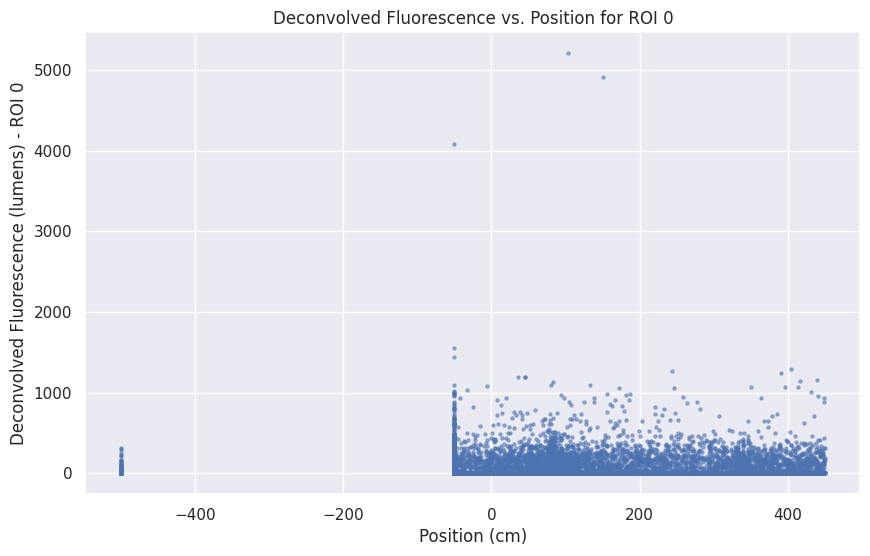

In [6]:
# Select an example ROI (e.g., the first one)
example_roi_index = 0

if len(timestamp_indices) > 0 and example_roi_index < fluorescence_data_subset.shape[1]:
    # Get deconvolved fluorescence for the example ROI
    example_roi_f = fluorescence_data_subset[:, example_roi_index]

    # Get corresponding position data
    # We need to find the position data points that are closest in time to the fluorescence timestamps
    # This is a basic approach; more sophisticated alignment might be needed for precise correlation
    position_timestamps = position.timestamps[:]
    position_data_all = position.data[:]

    # Find the index in position_timestamps closest to each timestamp_subset
    closest_position_indices = np.searchsorted(position_timestamps, timestamps_subset)

    # Ensure indices are within bounds
    closest_position_indices[closest_position_indices >= len(position_timestamps)] = len(position_timestamps) - 1

    aligned_position_data = position_data_all[closest_position_indices]

    # Plot deconvolved fluorescence vs. position
    plt.figure(figsize=(10, 6))
    plt.scatter(aligned_position_data, example_roi_f, alpha=0.5, s=5)
    plt.xlabel("Position (cm)")
    plt.ylabel(f"Deconvolved Fluorescence (lumens) - ROI {roi_response_series.rois.table.id[example_roi_index]}")
    plt.title(f"Deconvolved Fluorescence vs. Position for ROI {roi_response_series.rois.table.id[example_roi_index]}")
    plt.show()
else:
    print("Cannot perform neuron-behavior correlation: insufficient data.")

The scatter plot above shows the relationship between the deconvolved fluorescence of an example ROI and the animal's position in the track. A spatially tuned neuron (e.g., a place cell) would show higher activity at specific positions. This plot provides a basic visual assessment of potential spatial tuning for the selected neuron. More rigorous analysis would involve quantitative measures of spatial tuning.

## Summary and Future Directions

This notebook provided a basic introduction to accessing and exploring data from Dandiset 001361. We demonstrated how to load the Dandiset and an NWB file, examined the file contents, and visualized examples of behavioral and optical physiology data. We also showed a basic example of looking for neuron-behavior correlation by plotting fluorescence against position for an example ROI.

Possible future directions for analysis include:
- Further exploring the relationship between behavior (position, speed, reward) and neuronal activity (deconvolved fluorescence signals).
- Analyzing the activity of a larger population of neurons and identifying different cell types (e.g., place cells).
- Investigating the neural code for experience relative to reward, as suggested by the Dandiset title and associated publication.
- Utilizing the other NWB files in the Dandiset to compare activity and behavior across sessions or subjects.

This notebook serves as a starting point for researchers to delve deeper into this rich dataset and explore the neural correlates of navigation and reward learning in the hippocampus.

In [7]:
# Remember to close the NWB file when you are finished
io.close()